# Time Series Forecasting for Portfolio Management Optimization

In today’s highly dynamic financial markets, precise forecasting and portfolio management have become essential for investment success. As financial analysts, we strive to utilize innovative techniques to enhance our predictions and guide investment strategies. Guide Me in Finance (GMF) Investments, our firm, specializes in data-driven, personalized financial advisory services. By implementing advanced time series forecasting, our goal is to provide clients with actionable insights that help optimize returns and minimize risks, aligning with their unique financial goals.
GMF Investments harnesses real-time financial data from reliable sources, including YFinance, to remain responsive to shifting market conditions. This enables us to recommend timely portfolio adjustments that can capitalize on emerging opportunities or mitigate potential downturns. As we focus on integrating modern forecasting techniques, we aim to improve our decision-making accuracy in a competitive market landscape.

# Business Need
As financial analysts, one of our primary responsibilities at GMF is to analyze historical financial data to build predictive models that forecast future asset prices. Accurate forecasting allows us to adjust portfolio allocations proactively, optimizing returns and managing risks according to each client’s investment horizon, risk tolerance, and financial objectives. Given the complexity of market data, there is a critical need to refine our approach with more sophisticated models capable of capturing trends and patterns in asset prices over time.
The volatility and unpredictability of financial assets like Tesla (TSLA) stock, Vanguard Total Bond Market ETF (BND), and the S&P 500 ETF (SPY) present both risks and opportunities. Each asset’s unique characteristics demand specialized handling in our forecasting efforts. For instance, TSLA’s high volatility requires more advanced models, while BND’s stability makes it suitable for more conservative forecasting approaches. By utilizing a structured approach to time series analysis and model selection, we aim to gain insights that will enable GMF to deliver exceptional service to clients seeking to optimize their portfolios.

# Objective
The objective of this challenge is to equip trainees with the skills to preprocess financial data, develop time series forecasting models, analyze market trends, and optimize investment portfolios. Participants will gain hands-on experience in leveraging data-driven insights to enhance portfolio performance, minimize risks, and capitalize on market opportunities. Our primary objectives in this research are as follows:
1.	To preprocess, analyze, and understand historical data for key assets, specifically TSLA, BND, and SPY, using YFinance.
2.	To develop and evaluate time series forecasting models that predict future asset prices and market trends, with a focus on ARIMA, SARIMA, and LSTM methodologies.
3.	To utilize these forecasts in making data-driven portfolio adjustments, enhancing risk management, and maximizing returns for GMF’s clients.
4.	To analyze the risk-return profile of the portfolio using performance metrics such as the Sharpe Ratio and Value at Risk (VaR).



# Data Collection

We Use historical financial data for three key assets: Tesla (TSLA) Historical stock prices (Open, High, Low, Close), volume, and volatility., Vanguard Total Bond Market ETF (BND), and S&P 500 ETF (SPY). The data will be sourced from YFinance and cover the period from January 1, 2015, to December 31, 2024.

### Import Necessary Library

In [1]:
#!pip install yfinance pmdarima

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from pmdarima import auto_arima

from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.holtwinters import ExponentialSmoothing
#from prophet import Prophet

# For reproducibility
import tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')


## Data Loading and Preprocessing

In [45]:
# Load TSLA data from YFinance
ticker = 'TSLA'
start_date = '2015-01-01'
end_date = '2024-10-31'
tsla_data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [46]:
# Inspect data
tsla_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


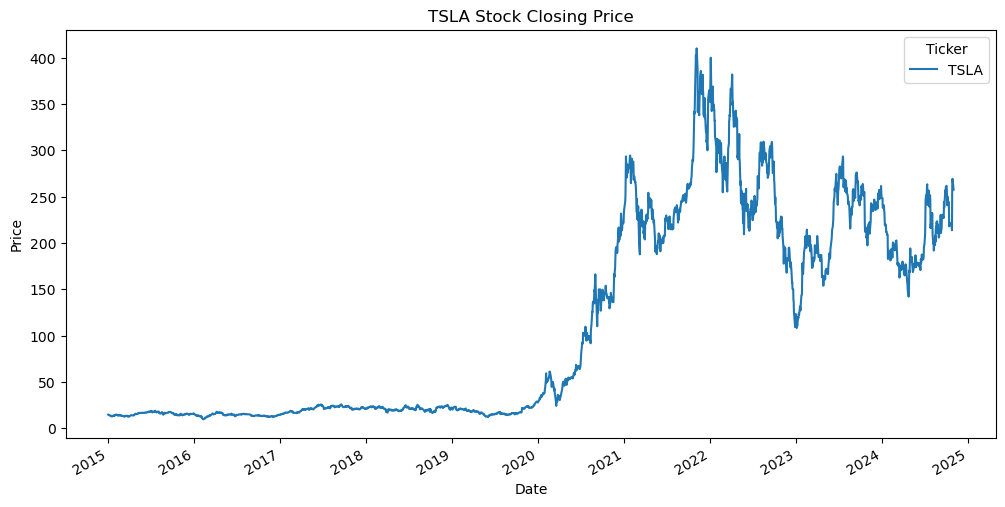

In [47]:
# Stock Closing Price
tsla_data['Adj Close'].plot(figsize=(12, 6), title=f"{ticker} Stock Closing Price", xlabel='Date', ylabel='Price')
plt.show()


## Data Cleaning and Preparation

In [48]:
# Check for missing values
print(tsla_data.isnull().sum())

# Fill missing values (if any)
tsla_data.fillna(method='ffill', inplace=True)

# Extract 'Close' prices and scale
close_prices = tsla_data['Adj Close']

Price      Ticker
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
dtype: int64


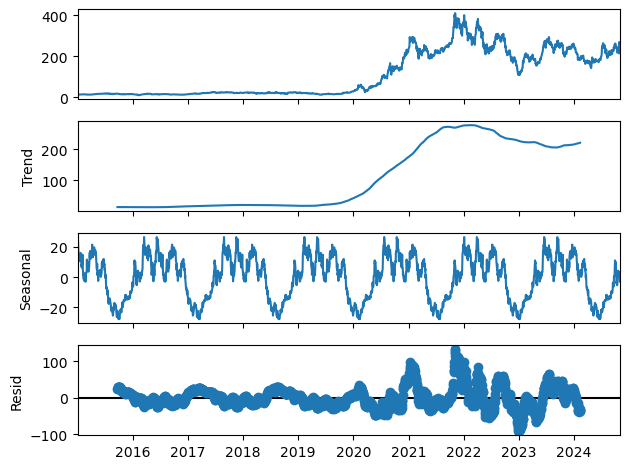

In [49]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tsla_data['Adj Close'], model='additive', period=365)
decomposition.plot()
plt.show()

In [50]:
from statsmodels.tsa.stattools import adfuller

# ADF test for stationarity
result = adfuller(tsla_data['Adj Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.1507672706146037
p-value: 0.6944080657685305


In [51]:
# # Check if initial p-value is greater than 0.05
# if result[1] > 0.05:
#     # Apply differencing to make the series stationary
#     tsla_data = tsla_data.diff().dropna()
    
#     # Run the ADF test again
#     result = adfuller(tsla_data)
    
# # Interpret stationarity
# stationarity_interpretation = "Stationary" if result[1] < 0.05 else "Non-Stationary"

# # Print results
# print(f"ADF Statistic after differencing: {result[0]}")
# print(f"p-value after differencing: {result[1]}")
# print(f"Interpretation: The series is {stationarity_interpretation}.")

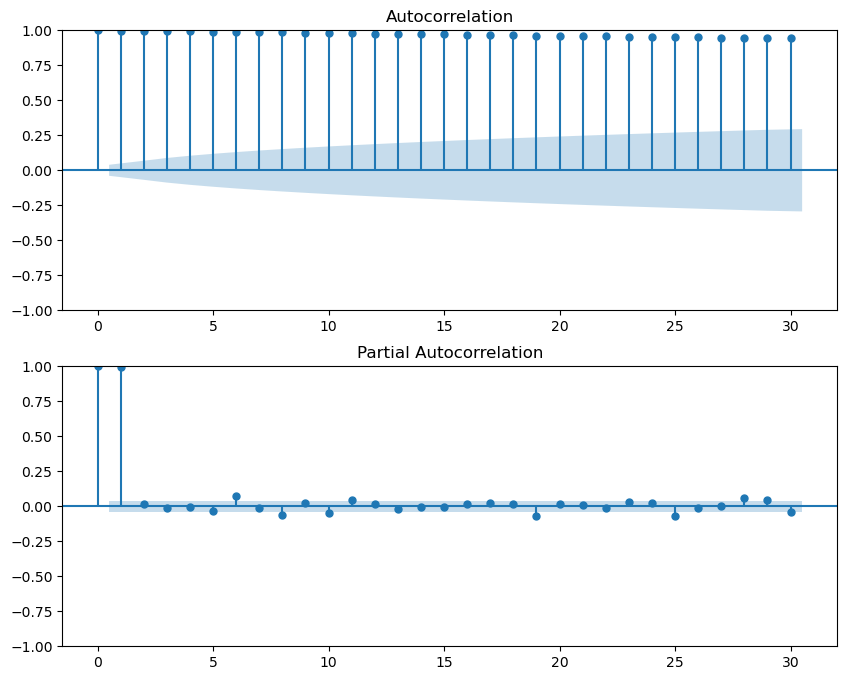

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(tsla_data['Adj Close'], ax=ax[0], lags=30)
plot_pacf(tsla_data['Adj Close'], ax=ax[1], lags=30)
plt.show()

## Train-Test Split

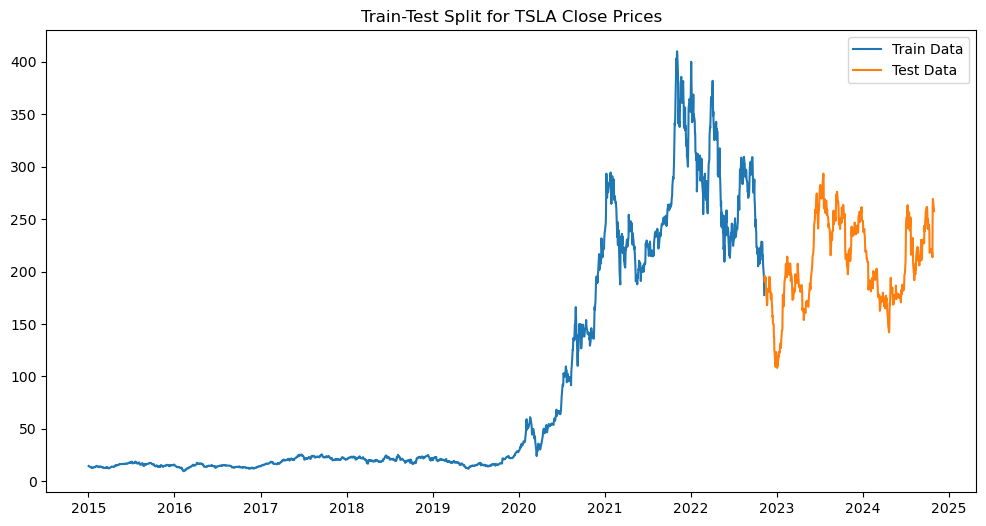

In [53]:
# Define the split ratio
split_ratio = 0.8
train_size = int(len(close_prices) * split_ratio)

# Split the data
train, test = close_prices[:train_size], close_prices[train_size:]
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data')
plt.legend()
plt.title("Train-Test Split for TSLA Close Prices")
plt.show()


## Model Building and Training

### 1. ARIMA Model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12345.046, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12340.889, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12339.852, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12339.956, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12339.337, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12341.053, Time=0.43 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.417 seconds
Optimal (p, d, q) parameters: (0, 1, 0)


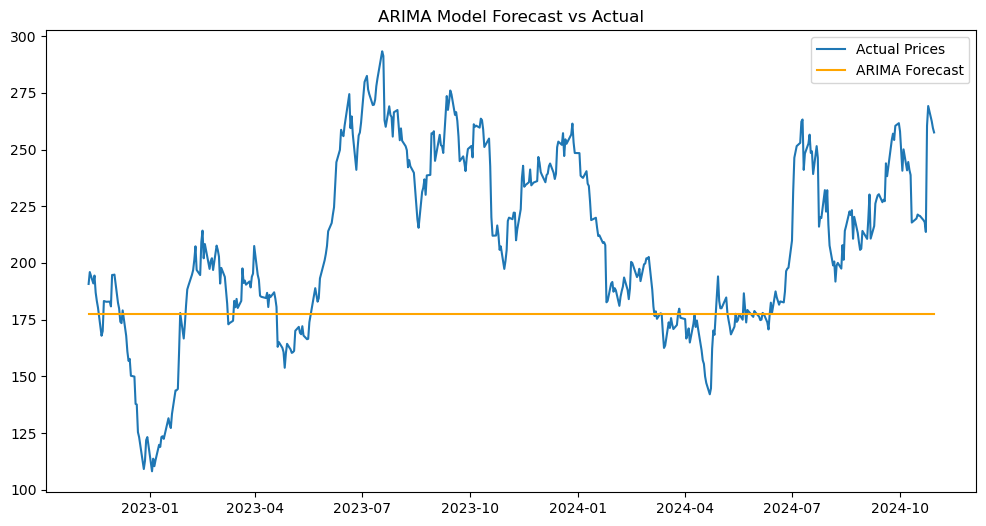

In [54]:
# Automatically find the optimal ARIMA (p, d, q) parameters using auto_arima
arima_model = auto_arima(train, seasonal=False, trace=True)
print(f"Optimal (p, d, q) parameters: {arima_model.order}")

# Fit the ARIMA model
model_arima = ARIMA(train, order=arima_model.order)
model_arima_fit = model_arima.fit()

# Forecast for the test period
arima_forecast = model_arima_fit.forecast(steps=len(test))

# Plot the forecast against the actual prices
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual Prices')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='orange')
plt.legend()
plt.title("ARIMA Model Forecast vs Actual")
plt.show()


### 2. SARIMA Model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=12337.622, Time=2.79 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=12340.889, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=12340.375, Time=0.55 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=12340.797, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=12339.337, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=12345.594, Time=2.08 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=12345.207, Time=2.63 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=12315.154, Time=14.22 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=12313.154, Time=11.48 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=12311.156, Time=8.78 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=12343.201, Time=1.77 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=12313.155, Time=13.47 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=12335.607, Time=3.46 sec
 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=12309.410, Time=4.74 sec
 A

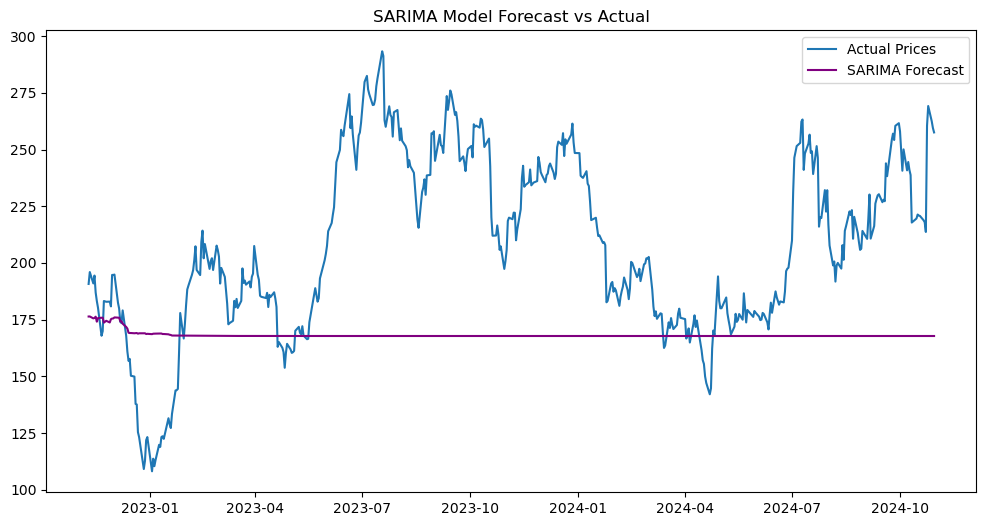

In [55]:
# Automatically find the best SARIMA parameters
sarima_model = auto_arima(train, seasonal=True, m=12, trace=True)
print(f"Optimal SARIMA (p, d, q)x(P, D, Q, m) parameters: {sarima_model.order}x{sarima_model.seasonal_order}")

# Fit the SARIMA model
model_sarima = SARIMAX(train, order=sarima_model.order, seasonal_order=sarima_model.seasonal_order)
model_sarima_fit = model_sarima.fit(disp=False)

# Forecast for the test period
sarima_forecast = model_sarima_fit.forecast(steps=len(test))

# Plot the forecast against the actual prices
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual Prices')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='purple')
plt.legend()
plt.title("SARIMA Model Forecast vs Actual")
plt.show()


### 3. LSTM Model

Epoch 1/10
60/60 [==============================] - 10s 67ms/step - loss: 0.0081
Epoch 2/10
60/60 [==============================] - 4s 66ms/step - loss: 0.0010
Epoch 3/10
60/60 [==============================] - 4s 67ms/step - loss: 9.3333e-04
Epoch 4/10
60/60 [==============================] - 4s 72ms/step - loss: 9.7976e-04
Epoch 5/10
60/60 [==============================] - 4s 72ms/step - loss: 7.6563e-04
Epoch 6/10
60/60 [==============================] - 4s 67ms/step - loss: 6.9139e-04
Epoch 7/10
60/60 [==============================] - 4s 64ms/step - loss: 7.2012e-04
Epoch 8/10
60/60 [==============================] - 4s 65ms/step - loss: 6.7612e-04
Epoch 9/10
60/60 [==============================] - 4s 66ms/step - loss: 5.9540e-04
Epoch 10/10
16/16 [==============================] - 4s 22ms/step


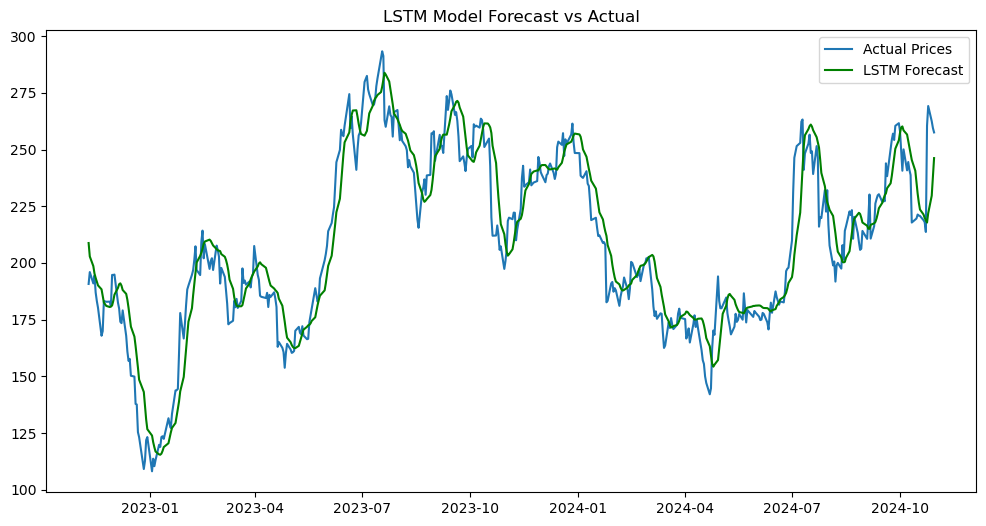

In [56]:
# Scale data for LSTM model
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(np.array(train).reshape(-1, 1))

# Prepare data for LSTM training
X_train, y_train = [], []
for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i])
    y_train.append(train_scaled[i])

X_train, y_train = np.array(X_train), np.array(y_train)

# Define LSTM model architecture
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

# Compile and train the LSTM model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32)

# Prepare test data inputs for LSTM predictions
# Only the last 60 values of `train` are combined with `test`
inputs = scaler.transform(np.array(train.iloc[-60:, 0].tolist() + test.iloc[:, 0].tolist()).reshape(-1, 1))

# Create sequences for LSTM prediction
X_test = [inputs[i-60:i] for i in range(60, len(inputs))]
X_test = np.array(X_test)

# Make predictions using the trained model
lstm_forecast = model_lstm.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast)  # Rescale predictions to original scale

# Ensure the forecast and test data are aligned for plotting
# Use only the last `len(test)` elements of `lstm_forecast`
lstm_forecast = lstm_forecast[-len(test):]

# Plot the LSTM forecast against the actual prices
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual Prices')
plt.plot(test.index, lstm_forecast, label='LSTM Forecast', color='green')
plt.legend()
plt.title("LSTM Model Forecast vs Actual")
plt.show()


## Model Evaluation

In [57]:
# Define function to calculate evaluation metrics
def calculate_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    rmse = mean_squared_error(actual, forecast, squared=False)
    mape = mean_absolute_percentage_error(actual, forecast)
    return mae, rmse, mape

# Evaluate models
arima_mae, arima_rmse, arima_mape = calculate_metrics(test, arima_forecast)
sarima_mae, sarima_rmse, sarima_mape = calculate_metrics(test, sarima_forecast)
lstm_mae, lstm_rmse, lstm_mape = calculate_metrics(test, lstm_forecast)

# Print metrics
print("ARIMA: MAE =", arima_mae, ", RMSE =", arima_rmse, ", MAPE =", arima_mape)
print("SARIMA: MAE =", sarima_mae, ", RMSE =", sarima_rmse, ", MAPE =", sarima_mape)
print("LSTM: MAE =", lstm_mae, ", RMSE =", lstm_rmse, ", MAPE =", lstm_mape)


ARIMA: MAE = 38.907052519827175 , RMSE = 49.1129918969654 , MAPE = 0.17612209105913845
SARIMA: MAE = 45.285010267271886 , RMSE = 55.686905545319846 , MAPE = 0.20261358125295573
LSTM: MAE = 10.037580840756195 , RMSE = 12.919786043731913 , MAPE = 0.05020009970799286
